## PA3.5(b) - Transfer Learning

### Use TL to replace encoder layer of FCN

In [1]:
## Data generation

In [2]:
from utils import *
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import torch
import gc
import copy
from dataloader_4 import *
from starter_4 import *
from tl_fcn import *


in starter_4
GPU_STATUS: True


In [3]:
# Precomputed Class Weights
class_weights = 1.0 / torch.FloatTensor([1.7796e-01, 6.1295e-01, 4.1182e-02, 8.9837e-03, 1.0163e-01, 6.8722e-03,
        1.4485e-03, 1.5937e-04, 4.7746e-02, 1.0698e-03])

In [4]:
#hyper param
epochs = 30   
lr = 0.0004
# criterion = nn.CrossEntropyLoss(weight=class_weights, reduction="mean")# Choose an appropriate loss function from https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html
criterion = nn.CrossEntropyLoss()
n_class = 10

print("creating model...")
fcn_model = TL_FCN(n_class=n_class)
fcn_model.apply(init_weights)

# gpu
gpu_status = torch.cuda.is_available()
print("GPU:", gpu_status)

if gpu_status : 
    device = torch.device('cuda') # determine which device to use (gpu or cpu)
else : 
    device = torch.device('cpu')

fcn_model.to(device)
    
print("Training...")
val(fcn_model, 0)  # show the accuracy before training
model_name="latest_model_5b"
train_loss_record, valid_loss_record = train(fcn_model, epochs,lr, save_fp=model_name) 

creating model...


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /tmp/xdg-cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

GPU: True
Training...
in val


/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()
/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_m

Loss at epoch: 0 is 5.4218869890485495
IoU at epoch: 0 is 0.0012335830237827307
Pixel acc at epoch: 0 is 0.00048662191589495966
in train


  0%|          | 0/30 [00:00<?, ?it/s]

epoch0, iter0, loss: 3.96927809715271
epoch0, iter10, loss: 3.4398884773254395
epoch0, iter20, loss: 3.360313892364502
epoch0, iter30, loss: 2.860905170440674
epoch0, iter40, loss: 2.8520994186401367
epoch0, iter50, loss: 2.28877329826355
Finish epoch 0, time elapsed 110.55774259567261
in val
Loss at epoch: 0 is 2.9519499710627963
IoU at epoch: 0 is 0.10013151826009678
Pixel acc at epoch: 0 is 0.21929535695484706


  3%|▎         | 1/30 [01:59<57:43, 119.43s/it]

epoch1, iter0, loss: 2.181467056274414
epoch1, iter10, loss: 1.8309506177902222
epoch1, iter20, loss: 2.508603811264038
epoch1, iter30, loss: 1.5798600912094116
epoch1, iter40, loss: 2.1128759384155273
epoch1, iter50, loss: 1.9794076681137085
Finish epoch 1, time elapsed 110.33064031600952
in val
Loss at epoch: 1 is 1.8190939937319075
IoU at epoch: 1 is 0.188038458868317
Pixel acc at epoch: 1 is 0.6781158873013088


  7%|▋         | 2/30 [03:58<55:41, 119.36s/it]

epoch2, iter0, loss: 1.62798273563385
epoch2, iter10, loss: 1.7399768829345703
epoch2, iter20, loss: 1.6247609853744507
epoch2, iter30, loss: 1.5458998680114746
epoch2, iter40, loss: 1.391263484954834
epoch2, iter50, loss: 1.1759439706802368
Finish epoch 2, time elapsed 106.76134443283081
in val
Loss at epoch: 2 is 1.4454579523631506
IoU at epoch: 2 is 0.20983328305612217
Pixel acc at epoch: 2 is 0.7360926696232387


 10%|█         | 3/30 [05:56<53:21, 118.57s/it]

epoch3, iter0, loss: 0.9333290457725525
epoch3, iter10, loss: 1.525208592414856
epoch3, iter20, loss: 1.161014199256897
epoch3, iter30, loss: 1.171220302581787
epoch3, iter40, loss: 1.2258058786392212
epoch3, iter50, loss: 1.0120363235473633
Finish epoch 3, time elapsed 113.07769703865051
in val
Loss at epoch: 3 is 1.1825381687709264
IoU at epoch: 3 is 0.23405299707396882
Pixel acc at epoch: 3 is 0.7624497073037284


 13%|█▎        | 4/30 [07:58<52:00, 120.03s/it]

epoch4, iter0, loss: 1.0847080945968628
epoch4, iter10, loss: 0.9829567670822144
epoch4, iter20, loss: 0.9601826071739197
epoch4, iter30, loss: 0.8435330986976624
epoch4, iter40, loss: 0.9698691964149475
epoch4, iter50, loss: 1.071448564529419
Finish epoch 4, time elapsed 112.31490635871887
in val
Loss at epoch: 4 is 0.9571487052100045
IoU at epoch: 4 is 0.2584784784734842
Pixel acc at epoch: 4 is 0.7856384686061314


 17%|█▋        | 5/30 [09:58<50:03, 120.13s/it]

epoch5, iter0, loss: 0.9326576590538025
epoch5, iter10, loss: 0.9277977347373962
epoch5, iter20, loss: 0.8713818192481995
epoch5, iter30, loss: 1.048786997795105
epoch5, iter40, loss: 1.2306660413742065
epoch5, iter50, loss: 1.0173932313919067
Finish epoch 5, time elapsed 110.33902168273926
in val
Loss at epoch: 5 is 1.0623834729194641
IoU at epoch: 5 is 0.30938360112408864
Pixel acc at epoch: 5 is 0.7865399973733085


 20%|██        | 6/30 [11:58<47:56, 119.86s/it]

epoch6, iter0, loss: 0.7845472693443298
epoch6, iter10, loss: 0.756181001663208
epoch6, iter20, loss: 0.5395469069480896
epoch6, iter30, loss: 0.7118923664093018
epoch6, iter40, loss: 0.9000229239463806
epoch6, iter50, loss: 1.0699204206466675
Finish epoch 6, time elapsed 110.65824055671692
in val
Loss at epoch: 6 is 0.8628289869853428
IoU at epoch: 6 is 0.3119230080698063
Pixel acc at epoch: 6 is 0.8046565055847168


 23%|██▎       | 7/30 [13:57<45:52, 119.66s/it]

epoch7, iter0, loss: 0.6328150629997253
epoch7, iter10, loss: 0.5499645471572876
epoch7, iter20, loss: 0.8966362476348877
epoch7, iter30, loss: 0.7533636689186096
epoch7, iter40, loss: 0.5598406195640564
epoch7, iter50, loss: 0.6052030324935913
Finish epoch 7, time elapsed 108.02038145065308
in val
Loss at epoch: 7 is 0.6538399713379996
IoU at epoch: 7 is 0.36195479255357416
Pixel acc at epoch: 7 is 0.816219517162868


 27%|██▋       | 8/30 [15:53<43:28, 118.58s/it]

epoch8, iter0, loss: 0.49296727776527405
epoch8, iter10, loss: 0.6133900880813599
epoch8, iter20, loss: 0.5255879163742065
epoch8, iter30, loss: 0.7739654779434204
epoch8, iter40, loss: 0.5409104824066162
epoch8, iter50, loss: 0.31204289197921753
Finish epoch 8, time elapsed 107.18813300132751
in val


 30%|███       | 9/30 [17:49<41:11, 117.70s/it]

Loss at epoch: 8 is 0.6474333916391645
IoU at epoch: 8 is 0.3232028263714133
Pixel acc at epoch: 8 is 0.8363843645368304
epoch9, iter0, loss: 0.5006058216094971
epoch9, iter10, loss: 0.7594980597496033
epoch9, iter20, loss: 0.6256399750709534
epoch9, iter30, loss: 0.5243334174156189
epoch9, iter40, loss: 0.626432478427887
epoch9, iter50, loss: 0.5442101955413818
Finish epoch 9, time elapsed 106.80421090126038
in val
Loss at epoch: 9 is 0.6410192889826638
IoU at epoch: 9 is 0.37917995925205383
Pixel acc at epoch: 9 is 0.8293686849730355


 33%|███▎      | 10/30 [19:44<38:58, 116.92s/it]

epoch10, iter0, loss: 0.4346175789833069
epoch10, iter10, loss: 0.7335138320922852
epoch10, iter20, loss: 0.46232298016548157
epoch10, iter30, loss: 0.31790444254875183
epoch10, iter40, loss: 0.41623881459236145
epoch10, iter50, loss: 0.658047080039978
Finish epoch 10, time elapsed 107.34017705917358
in val
Loss at epoch: 10 is 0.5514098959309714
IoU at epoch: 10 is 0.39863456871652925
Pixel acc at epoch: 10 is 0.8499902146203178


 37%|███▋      | 11/30 [21:41<36:59, 116.84s/it]

epoch11, iter0, loss: 0.39605095982551575
epoch11, iter10, loss: 0.6392290592193604
epoch11, iter20, loss: 0.8119891881942749
epoch11, iter30, loss: 0.5536724925041199
epoch11, iter40, loss: 0.6310102343559265
epoch11, iter50, loss: 0.49382856488227844
Finish epoch 11, time elapsed 109.6008083820343
in val


 40%|████      | 12/30 [23:39<35:08, 117.11s/it]

Loss at epoch: 11 is 0.5856661966868809
IoU at epoch: 11 is 0.39768125168433255
Pixel acc at epoch: 11 is 0.8297598617417472
epoch12, iter0, loss: 0.5352042317390442
epoch12, iter10, loss: 0.705031156539917
epoch12, iter20, loss: 0.4703739583492279
epoch12, iter30, loss: 0.34686756134033203
epoch12, iter40, loss: 0.7186155915260315
epoch12, iter50, loss: 0.4567631483078003
Finish epoch 12, time elapsed 107.52111053466797
in val
Loss at epoch: 12 is 0.5688525651182447
IoU at epoch: 12 is 0.42671634271675446
Pixel acc at epoch: 12 is 0.8509788002286639


 43%|████▎     | 13/30 [25:33<32:57, 116.33s/it]

epoch13, iter0, loss: 0.36369550228118896
epoch13, iter10, loss: 0.5229440927505493
epoch13, iter20, loss: 0.7644315361976624
epoch13, iter30, loss: 0.7819201350212097
epoch13, iter40, loss: 0.45039618015289307
epoch13, iter50, loss: 0.4687519669532776
Finish epoch 13, time elapsed 110.92773175239563
in val


 47%|████▋     | 14/30 [27:32<31:15, 117.21s/it]

Loss at epoch: 13 is 0.6906513103416988
IoU at epoch: 13 is 0.41852474988986216
Pixel acc at epoch: 13 is 0.8556548442159381
epoch14, iter0, loss: 0.31061387062072754
epoch14, iter10, loss: 0.5752685070037842
epoch14, iter20, loss: 0.679080605506897
epoch14, iter30, loss: 0.7224052548408508
epoch14, iter40, loss: 0.5103816390037537
epoch14, iter50, loss: 0.46000856161117554
Finish epoch 14, time elapsed 111.02639102935791
in val
Loss at epoch: 14 is 0.48564439160483225
IoU at epoch: 14 is 0.45045635435712267
Pixel acc at epoch: 14 is 0.8706674235207694


 50%|█████     | 15/30 [29:32<29:30, 118.01s/it]

epoch15, iter0, loss: 0.3408951461315155
epoch15, iter10, loss: 0.5090001225471497
epoch15, iter20, loss: 0.5700032711029053
epoch15, iter30, loss: 0.7596428394317627
epoch15, iter40, loss: 0.41828054189682007
epoch15, iter50, loss: 0.5592834949493408
Finish epoch 15, time elapsed 115.70149183273315
in val


 53%|█████▎    | 16/30 [31:36<27:57, 119.85s/it]

Loss at epoch: 15 is 0.5836888211114066
IoU at epoch: 15 is 0.3984477734530111
Pixel acc at epoch: 15 is 0.8380695070539202
epoch16, iter0, loss: 0.404335618019104
epoch16, iter10, loss: 0.3987088203430176
epoch16, iter20, loss: 0.48562920093536377
epoch16, iter30, loss: 0.6808491945266724
epoch16, iter40, loss: 0.3523772060871124
epoch16, iter50, loss: 0.2605058550834656
Finish epoch 16, time elapsed 114.51058912277222
in val
Loss at epoch: 16 is 0.425520977803639
IoU at epoch: 16 is 0.4744983533705646
Pixel acc at epoch: 16 is 0.8731584548950195


 57%|█████▋    | 17/30 [33:41<26:15, 121.19s/it]

epoch17, iter0, loss: 0.5833051204681396
epoch17, iter10, loss: 0.4591999053955078
epoch17, iter20, loss: 0.44893524050712585
epoch17, iter30, loss: 0.47934314608573914
epoch17, iter40, loss: 0.25459542870521545
epoch17, iter50, loss: 0.36970168352127075
Finish epoch 17, time elapsed 150.18037176132202
in val


 60%|██████    | 18/30 [36:21<26:37, 133.10s/it]

Loss at epoch: 17 is 0.537987734590258
IoU at epoch: 17 is 0.4437388257147816
Pixel acc at epoch: 17 is 0.8419836163520813
epoch18, iter0, loss: 0.49271121621131897
epoch18, iter10, loss: 0.28073909878730774
epoch18, iter20, loss: 0.5280017256736755
epoch18, iter30, loss: 0.2781924307346344
epoch18, iter40, loss: 0.8472912907600403
epoch18, iter50, loss: 0.5519923567771912
Finish epoch 18, time elapsed 149.70855689048767
in val


 63%|██████▎   | 19/30 [39:02<25:53, 141.20s/it]

Loss at epoch: 18 is 1.0862957409449987
IoU at epoch: 18 is 0.35499388190701603
Pixel acc at epoch: 18 is 0.7013804061072213
epoch19, iter0, loss: 0.4754889905452728
epoch19, iter10, loss: 0.4276682138442993
epoch19, iter20, loss: 0.7274690866470337
epoch19, iter30, loss: 0.3565060794353485
epoch19, iter40, loss: 0.20503300428390503
epoch19, iter50, loss: 0.4625955820083618
Finish epoch 19, time elapsed 147.97622895240784
in val


 67%|██████▋   | 20/30 [41:40<24:24, 146.44s/it]

Loss at epoch: 19 is 0.4395430513790676
IoU at epoch: 19 is 0.4635247729186501
Pixel acc at epoch: 19 is 0.8634822283472333
epoch20, iter0, loss: 0.417819082736969
epoch20, iter10, loss: 0.4043530225753784
epoch20, iter20, loss: 0.3247522711753845
epoch20, iter30, loss: 0.38102200627326965
epoch20, iter40, loss: 0.42691096663475037
epoch20, iter50, loss: 0.3101416826248169
Finish epoch 20, time elapsed 135.83933281898499
in val


 70%|███████   | 21/30 [44:06<21:57, 146.35s/it]

Loss at epoch: 20 is 0.4328602594988687
IoU at epoch: 20 is 0.4693567549742234
Pixel acc at epoch: 20 is 0.861043563910893
epoch21, iter0, loss: 0.2595178782939911
epoch21, iter10, loss: 0.24456074833869934
epoch21, iter20, loss: 0.5726760625839233
epoch21, iter30, loss: 0.30367207527160645
epoch21, iter40, loss: 0.3949657678604126
epoch21, iter50, loss: 0.5183425545692444
Finish epoch 21, time elapsed 141.27121114730835
in val


 73%|███████▎  | 22/30 [46:38<19:44, 148.05s/it]

Loss at epoch: 21 is 0.4630810022354126
IoU at epoch: 21 is 0.46548048422361415
Pixel acc at epoch: 21 is 0.8690857461520604
epoch22, iter0, loss: 0.17748934030532837
epoch22, iter10, loss: 0.3580161929130554
epoch22, iter20, loss: 0.29666781425476074
epoch22, iter30, loss: 0.5186370015144348
epoch22, iter40, loss: 0.4249148368835449
epoch22, iter50, loss: 0.4181918501853943
Finish epoch 22, time elapsed 143.8568034172058
in val
Loss at epoch: 22 is 0.3464528002909252
IoU at epoch: 22 is 0.4905661892002266
Pixel acc at epoch: 22 is 0.88469569172178


 77%|███████▋  | 23/30 [49:13<17:30, 150.09s/it]

epoch23, iter0, loss: 0.31753259897232056
epoch23, iter10, loss: 0.3969562351703644
epoch23, iter20, loss: 0.4580698013305664
epoch23, iter30, loss: 0.3529633581638336
epoch23, iter40, loss: 0.37952718138694763
epoch23, iter50, loss: 0.4592069089412689
Finish epoch 23, time elapsed 141.32071828842163
in val
Loss at epoch: 23 is 0.3434578499623707
IoU at epoch: 23 is 0.5102537522046133
Pixel acc at epoch: 23 is 0.893382557800838


 80%|████████  | 24/30 [51:46<15:04, 150.81s/it]

epoch24, iter0, loss: 0.5097226500511169
epoch24, iter10, loss: 0.3854835629463196
epoch24, iter20, loss: 0.40932607650756836
epoch24, iter30, loss: 0.24242335557937622
epoch24, iter40, loss: 0.31574079394340515
epoch24, iter50, loss: 0.3063901364803314
Finish epoch 24, time elapsed 140.7321538925171
in val


 83%|████████▎ | 25/30 [54:17<12:34, 150.88s/it]

Loss at epoch: 24 is 0.6395233784403119
IoU at epoch: 24 is 0.39646479927236744
Pixel acc at epoch: 24 is 0.7894941142627171
epoch25, iter0, loss: 0.37125536799430847
epoch25, iter10, loss: 0.540495753288269
epoch25, iter20, loss: 0.19513633847236633
epoch25, iter30, loss: 0.5618062615394592
epoch25, iter40, loss: 0.26544851064682007
epoch25, iter50, loss: 0.27858731150627136
Finish epoch 25, time elapsed 146.0949683189392
in val


 87%|████████▋ | 26/30 [56:54<10:10, 152.64s/it]

Loss at epoch: 25 is 0.3413161890847342
IoU at epoch: 25 is 0.4834615028626753
Pixel acc at epoch: 25 is 0.8864855255399432
epoch26, iter0, loss: 0.32131755352020264
epoch26, iter10, loss: 0.3016577661037445
epoch26, iter20, loss: 0.519010603427887
epoch26, iter30, loss: 0.41062626242637634
epoch26, iter40, loss: 0.3818603754043579
epoch26, iter50, loss: 0.17719604074954987
Finish epoch 26, time elapsed 140.55362176895142
in val
Loss at epoch: 26 is 0.33274349357400623
IoU at epoch: 26 is 0.5173105383862039
Pixel acc at epoch: 26 is 0.9043408121381488


 90%|█████████ | 27/30 [59:24<07:35, 151.87s/it]

epoch27, iter0, loss: 0.3252173364162445
epoch27, iter10, loss: 0.2993912696838379
epoch27, iter20, loss: 0.49065297842025757
epoch27, iter30, loss: 0.3364250063896179
epoch27, iter40, loss: 0.33921483159065247
epoch27, iter50, loss: 0.18221613764762878
Finish epoch 27, time elapsed 141.40591859817505
in val


 93%|█████████▎| 28/30 [1:01:53<05:02, 151.07s/it]

Loss at epoch: 27 is 0.36938217282295227
IoU at epoch: 27 is 0.48995523660046697
Pixel acc at epoch: 27 is 0.8796090994562421
epoch28, iter0, loss: 0.418300986289978
epoch28, iter10, loss: 0.333978533744812
epoch28, iter20, loss: 0.4006381630897522
epoch28, iter30, loss: 0.2278510183095932
epoch28, iter40, loss: 0.21040049195289612
epoch28, iter50, loss: 0.28689292073249817
Finish epoch 28, time elapsed 80.0936427116394
in val
Loss at epoch: 28 is 0.2934250405856541
IoU at epoch: 28 is 0.5277543958403749
Pixel acc at epoch: 28 is 0.9059832436697823


 97%|█████████▋| 29/30 [1:03:19<02:11, 131.60s/it]

epoch29, iter0, loss: 0.19116665422916412
epoch29, iter10, loss: 0.3229179084300995
epoch29, iter20, loss: 0.37008774280548096
epoch29, iter30, loss: 0.27614709734916687
epoch29, iter40, loss: 0.3759990930557251
epoch29, iter50, loss: 0.339506059885025
Finish epoch 29, time elapsed 69.79901909828186
in val


100%|██████████| 30/30 [1:04:34<00:00, 129.16s/it]

Loss at epoch: 29 is 0.378342581646783
IoU at epoch: 29 is 0.47913135419711705
Pixel acc at epoch: 29 is 0.8828038402966091


In [5]:
latest_fcn_model = torch.load(model_name)
latest_fcn_model.to(device)
test(latest_fcn_model)

in test
Loss :is 0.2602092219250543
IoU is 0.5421788780009642
Pixel is 0.9201822195734296


0

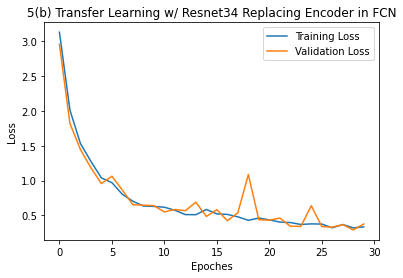

In [6]:
# Plot
plt.plot(np.arange(epochs), train_loss_record, label= "Training Loss")
plt.plot(np.arange(epochs), valid_loss_record, label="Validation Loss")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend()
plt.title("5(b) Transfer Learning w/ Resnet34 Replacing Encoder in FCN")
plt.savefig("plots/Q5_b")
plt.show()

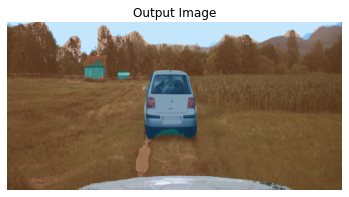

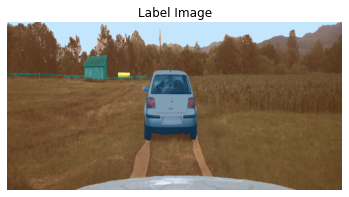

0

In [8]:
test_dataset = TASDataset('tas500v1.1', eval_mode=True, mode='test')
test_loader = DataLoader(dataset=test_dataset, batch_size= batch_size, shuffle=False)
visualize("latest_model_5b", test_loader, device)